In [104]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# this code remove all the warnings
warnings.filterwarnings("ignore")

In [108]:
# Load dataset 
unemployment = pd.read_csv('Unemployment in India.csv')
unemployment20 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [110]:
unemployment.sample(5)

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
454    Delhi   30-06-2020    Monthly                             18.11   
218   Odisha   30-06-2019    Monthly                              4.71   
665   Sikkim   31-12-2019    Monthly                              7.37   
553   Kerala   30-11-2019    Monthly                              6.71   
91   Gujarat   30-04-2020    Monthly                             12.00   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
454            4306807.0                                     34.32  Urban  
218           10965154.0                                     39.94  Rural  
665              88035.0                                     45.24  Urban  
553            4062767.0                                     32.36  Urban  
91             8587594.0                                     34.77  Rural

In [112]:
unemployment20.sample(5)

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
157       Meghalaya   30-09-2020          M                              4.29   
136  Madhya Pradesh   31-08-2020          M                              4.70   
99        Jharkhand   31-01-2020          M                             10.61   
118       Karnataka   31-10-2020          M                              1.58   
75          Haryana   30-06-2020          M                             26.70   

      Estimated Employed   Estimated Labour Participation Rate (%)   Region.1  \
157              1459726                                     64.60  Northeast   
136             23619011                                     40.08       West   
99              10198029                                     42.92       East   
118             22356390                                     40.30      South   
75               6951934                                     42.14      North   

     longitude  latitude  
157    25.4670   91.3662  
136    22.9734   78.6569  
99     23.6102   85.2799  
118    15.3173   75.7139  
75     29.0588   76.0856

In [114]:
print(unemployment.shape)

(768, 7)


In [116]:
print(unemployment20.shape)

(267, 9)


In [118]:
# Datatypes of columns
unemployment.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [120]:
unemployment20.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [122]:
# Finding null values
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [124]:
unemployment20.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [126]:
# Finding duplicated values
unemployment.duplicated().sum()

27

In [128]:
unemployment20.duplicated().sum()

0

In [130]:
# Names of columns in dataset
unemployment.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

In [132]:
unemployment20.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Region.1',
 'longitude',
 'latitude']

In [134]:
# this line of code selects all columns which have 'object' datatype
unemployment_selected_col = list(unemployment.select_dtypes("object").columns)
unemployment20_selected_col = list(unemployment20.select_dtypes("object").columns)

In [136]:
for col in unemployment_selected_col:
    print(f"...Categories in {col} column...")
    print(unemployment[col].unique(), end="\n\n")

...Categories in Region column...
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']

...Categories in  Date column...
[' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020' nan]

...Categories in  Frequency column...
[' Monthly' nan 'Monthly']

...Categories in Area column...
['Rural' nan 'Urban']



In [138]:
for col in unemployment20_selected_col:
    print(f"...Categories in {col} column...")
    print(unemployment20[col].unique(), end="\n\n")

...Categories in Region column...
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

...Categories in  Date column...
[' 31-01-2020' ' 29-02-2020' ' 31-03-2020' ' 30-04-2020' ' 31-05-2020'
 ' 30-06-2020' ' 31-07-2020' ' 31-08-2020' ' 30-09-2020' ' 31-10-2020']

...Categories in  Frequency column...
[' M']

...Categories in Region.1 column...
['South' 'Northeast' 'East' 'West' 'North']



In [140]:
# Eliminating null values
unemployment[unemployment["Region"].isnull()]

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
359    NaN   NaN        NaN                               NaN   
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   
754    NaN   NaN        NaN                               NaN   
755    NaN   NaN        NaN                               NaN   
756    NaN   NaN        NaN                               NaN   
757    NaN   NaN        NaN                               NaN   
758    NaN   NaN        NaN                               NaN   
759    NaN   NaN        NaN                               NaN   
760    NaN   NaN        NaN                               NaN   
761    NaN   NaN        NaN                               NaN   
762    NaN   NaN        NaN                               NaN   
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
359                  NaN                                       NaN  NaN  
360                  NaN                                       NaN  NaN  
361                  NaN                                       NaN  NaN  
362                  NaN                                       NaN  NaN  
363                  NaN                                       NaN  NaN  
364                  NaN                                       NaN  NaN  
365                  NaN                                       NaN  NaN  
366                  NaN                                       NaN  NaN  
367                  NaN                                       NaN  NaN  
368                  NaN                                       NaN  NaN  
369                  NaN                                       NaN  NaN  
370                  NaN                                       NaN  NaN  
371                  NaN                                       NaN  NaN  
372                  NaN                                       NaN  NaN  
754                  NaN                                       NaN  NaN  
755                  NaN                                       NaN  NaN  
756                  NaN                                       NaN  NaN  
757                  NaN                                       NaN  NaN  
758                  NaN                                       NaN  NaN  
759                  NaN                                       NaN  NaN  
760                  NaN                                       NaN  NaN  
761                  NaN                                       NaN  NaN  
762                  NaN                                       NaN  NaN  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                      

In [142]:
unemployment.dropna(inplace=True)

In [144]:
# Shape of dataset after removing null values
unemployment.shape

(740, 7)

In [146]:
# lets see if any null still exists in dataset
unemployment.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [148]:
# Removing leading white-spaces from column's name and converting to lowercase
unemployment.columns = unemployment.columns.str.strip()
unemployment20.columns = unemployment20.columns.str.strip()

unemployment.columns = unemployment.columns.str.lower()
unemployment20.columns = unemployment20.columns.str.lower()

In [150]:
print(unemployment.columns)
print(unemployment20.columns)

Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'area'],
      dtype='object')
Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')


In [152]:
# Converting date col's data-type to Datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment20['date'] = pd.to_datetime(unemployment20['date'])

In [154]:
# Removing leading and trailing white-spaces from categorical columns
unemployment['frequency'] = unemployment['frequency'].apply(lambda x: x.strip())
unemployment20['frequency'] = 'Monthly'

In [156]:
# Data Cleaning
unemployment.sample(5)

region       date frequency  estimated unemployment rate (%)  \
80          Gujarat 2019-05-31   Monthly                             2.88   
407           Bihar 2019-11-30   Monthly                            17.62   
283      Tamil Nadu 2019-12-31   Monthly                             3.73   
276      Tamil Nadu 2019-05-31   Monthly                             0.97   
574  Madhya Pradesh 2020-06-30   Monthly                            12.72   

     estimated employed  estimated labour participation rate (%)   area  
80           13954728.0                                    52.03  Rural  
407           3081077.0                                    38.86  Urban  
283          15356938.0                                    48.80  Rural  
276          15844698.0                                    49.44  Rural  
574           6221562.0                                    38.72  Urban

In [158]:
unemployment20.sample(5)

region       date frequency  estimated unemployment rate (%)  \
201          Sikkim 2020-05-31   Monthly                            24.51   
169      Puducherry 2020-01-31   Monthly                             0.58   
71          Haryana 2020-02-29   Monthly                            25.77   
118       Karnataka 2020-10-31   Monthly                             1.58   
135  Madhya Pradesh 2020-07-31   Monthly                             5.08   

     estimated employed  estimated labour participation rate (%)   region.1  \
201              193427                                    44.88  Northeast   
169              457950                                    37.46      South   
71              7322942                                    44.21      North   
118            22356390                                    40.30      South   
135            23940158                                    40.88       West   

     longitude  latitude  
201    27.5330   88.5122  
169    11.9416   79.8083  
71     29.0588   76.0856  
118    15.3173   75.7139  
135    22.9734   78.6569

In [160]:
# Concatenating both datasets
df = pd.concat([unemployment, unemployment20], ignore_index=True)
df.drop(columns=['area', 'region.1', 'longitude', 'latitude'], inplace=True)

In [162]:
df.sample(5)

region       date frequency  estimated unemployment rate (%)  \
190     Maharashtra 2019-06-30   Monthly                             4.34   
539          Kerala 2019-11-30   Monthly                             6.71   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
891       Meghalaya 2020-03-31   Monthly                             1.58   
950      Tamil Nadu 2020-04-30   Monthly                            49.83   

     estimated employed  estimated labour participation rate (%)  
190          23056511.0                                    45.69  
539           4062767.0                                    32.36  
2            12086707.0                                    43.50  
891           1482351.0                                    64.74  
950           9719167.0                                    29.63

In [164]:
# Adding new columns
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.sample(5)

region       date frequency  estimated unemployment rate (%)  \
560    Madhya Pradesh 2020-06-30   Monthly                            12.72   
430             Delhi 2019-08-31   Monthly                            13.52   
426      Chhattisgarh 2020-06-30   Monthly                            27.07   
120  Himachal Pradesh 2020-05-31   Monthly                            25.64   
608        Puducherry 2019-11-30   Monthly                             1.37   

     estimated employed  estimated labour participation rate (%)  month  year  
560           6221562.0                                    38.72      6  2020  
430           5552510.0                                    42.90      8  2019  
426           1602231.0                                    39.41      6  2020  
120           1732050.0                                    42.62      5  2020  
608            275003.0                                    34.19     11  2019

In [166]:
# Exploratory data Analysis
df[df['region'] == "Andhra Pradesh"].sort_values("date")

region       date frequency  estimated unemployment rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
359  Andhra Pradesh 2019-05-31   Monthly                             6.09   
1    Andhra Pradesh 2019-06-30   Monthly                             3.05   
360  Andhra Pradesh 2019-06-30   Monthly                             3.80   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
361  Andhra Pradesh 2019-07-31   Monthly                             5.64   
3    Andhra Pradesh 2019-08-31   Monthly                             3.32   
362  Andhra Pradesh 2019-08-31   Monthly                             4.61   
363  Andhra Pradesh 2019-09-30   Monthly                             6.01   
4    Andhra Pradesh 2019-09-30   Monthly                             5.17   
5    Andhra Pradesh 2019-10-31   Monthly                             3.52   
364  Andhra Pradesh 2019-10-31   Monthly                             4.70   
6    Andhra Pradesh 2019-11-30   Monthly                             4.12   
365  Andhra Pradesh 2019-11-30   Monthly                             7.54   
7    Andhra Pradesh 2019-12-31   Monthly                             4.38   
366  Andhra Pradesh 2019-12-31   Monthly                             7.88   
740  Andhra Pradesh 2020-01-31   Monthly                             5.48   
8    Andhra Pradesh 2020-01-31   Monthly                             4.84   
367  Andhra Pradesh 2020-01-31   Monthly                             7.11   
9    Andhra Pradesh 2020-02-29   Monthly                             5.91   
741  Andhra Pradesh 2020-02-29   Monthly                             5.83   
368  Andhra Pradesh 2020-02-29   Monthly                             5.66   
369  Andhra Pradesh 2020-03-31   Monthly                             9.88   
10   Andhra Pradesh 2020-03-31   Monthly                             4.06   
742  Andhra Pradesh 2020-03-31   Monthly                             5.79   
370  Andhra Pradesh 2020-04-30   Monthly                            32.30   
11   Andhra Pradesh 2020-04-30   Monthly                            16.29   
743  Andhra Pradesh 2020-04-30   Monthly                            20.51   
12   Andhra Pradesh 2020-05-31   Monthly                            14.46   
371  Andhra Pradesh 2020-05-31   Monthly                            24.91   
744  Andhra Pradesh 2020-05-31   Monthly                            17.43   
13   Andhra Pradesh 2020-06-30   Monthly                             0.85   
372  Andhra Pradesh 2020-06-30   Monthly                             5.86   
745  Andhra Pradesh 2020-06-30   Monthly                             3.31   
746  Andhra Pradesh 2020-07-31   Monthly                             8.34   
747  Andhra Pradesh 2020-08-31   Monthly                             6.96   
748  Andhra Pradesh 2020-09-30   Monthly                             6.40   
749  Andhra Pradesh 2020-10-31   Monthly                             6.59   

     estimated employed  estimated labour participation rate (%)  month  year  
0            11999139.0                                    43.24      5  2019  
359           4788661.0                                    37.45      5  2019  
1            11755881.0                                    42.05      6  2019  
360           4824630.0                                    36.76      6  2019  
2            12086707.0                                    43.50      7  2019  
361           4657443.0                                    36.10      7  2019  
3            12285693.0                                    43.97      8  2019  
362           4743179.0                                    36.29      8  2019  
363           4733996.0                                    36.69      9  2019  
4            12256762.0                                    44.68      9  2019  
5            12017412.0                                    43.01     10  2019  
364           4774377.0                          

In [168]:
df[["month", "year"]] = df[["month", "year"]].astype(int)

In [170]:
# highest average estimated unemployment rate (%)
df.groupby("region")["estimated unemployment rate (%)"].mean().sort_values(ascending=False).index[0]

'Tripura'

In [172]:
# lowest average estimated unemployment rate (%)
df.groupby("region")["estimated unemployment rate (%)"].mean().sort_values(ascending=False).index[-1]

'Meghalaya'

In [174]:
# highest estimated labour participation rate (%)
df.groupby("region")["estimated labour participation rate (%)"].mean().sort_values(ascending=False).index[0]

'Tripura'

In [176]:
# lowest estimated labour participation rate (%)
df.groupby("region")["estimated labour participation rate (%)"].mean().sort_values(ascending=False).index[-1]

'Uttarakhand'

In [178]:
years_months = df.groupby(["year", "month"])
index = []
region = []
value = []
for year_month in list(years_months.groups.keys()):
    index.append(year_month)
    res = years_months.get_group(year_month)[years_months.get_group(year_month)["estimated unemployment rate (%)"] == 
                                        years_months.get_group(year_month)["estimated unemployment rate (%)"].max()][["region", "estimated unemployment rate (%)"]]
    region.append(res["region"].to_list()[0])
    value.append(res["estimated unemployment rate (%)"].to_list()[0])

In [180]:
pd.DataFrame({
    "region" : region,
    "estimated unemployment rate (%)" : value
}, index=index)

region  estimated unemployment rate (%)
(2019, 5)            Tripura                            34.69
(2019, 6)            Tripura                            26.64
(2019, 7)            Tripura                            25.81
(2019, 8)            Tripura                            33.45
(2019, 9)            Tripura                            33.57
(2019, 10)           Tripura                            27.54
(2019, 11)  Himachal Pradesh                            27.27
(2019, 12)           Tripura                            33.48
(2020, 1)            Tripura                            34.37
(2020, 2)            Tripura                            33.88
(2020, 3)            Tripura                            31.61
(2020, 4)         Puducherry                            76.74
(2020, 5)         Puducherry                            75.00
(2020, 6)            Haryana                            35.57
(2020, 7)   Himachal Pradesh                            24.31
(2020, 8)            Haryana                            33.50
(2020, 9)        Uttarakhand                            22.26
(2020, 10)           Haryana                            27.31

In [182]:
# top 3 states with highest unemployment rate over the time
first = []
second = []
third = []
for year_month in list(years_months.groups.keys()):
    f, s, t = years_months.get_group(year_month)[["region", "estimated unemployment rate (%)"]].sort_values(
    by="estimated unemployment rate (%)", ascending=False)["region"].iloc[:3]
    first.append(f); second.append(s); third.append(t);

pd.DataFrame({
    "first" : first,
    "second" : second,
    "third" : third
}, index=index)
    

first      second             third
(2019, 5)            Tripura     Tripura           Haryana
(2019, 6)            Tripura     Tripura           Haryana
(2019, 7)            Tripura     Haryana           Tripura
(2019, 8)            Tripura     Haryana           Tripura
(2019, 9)            Tripura     Tripura           Haryana
(2019, 10)           Tripura     Tripura           Haryana
(2019, 11)  Himachal Pradesh     Tripura           Haryana
(2019, 12)           Tripura     Haryana           Tripura
(2020, 1)            Tripura     Tripura           Tripura
(2020, 2)            Tripura     Tripura  Himachal Pradesh
(2020, 3)            Tripura     Tripura           Haryana
(2020, 4)         Puducherry  Puducherry        Puducherry
(2020, 5)         Puducherry   Jharkhand         Jharkhand
(2020, 6)            Haryana     Haryana            Kerala
(2020, 7)   Himachal Pradesh     Haryana             Delhi
(2020, 8)            Haryana     Tripura         Rajasthan
(2020, 9)        Uttarakhand     Haryana           Tripura
(2020, 10)           Haryana   Rajasthan   Jammu & Kashmir

In [184]:
# top 3 states with lowest unemployment rate over the time
first = []
second = []
third = []
for year_month in list(years_months.groups.keys()):
    f, s, t = years_months.get_group(year_month)[["region", "estimated unemployment rate (%)"]].sort_values(
    by="estimated unemployment rate (%)", ascending=True)["region"].iloc[:3]
    first.append(f); second.append(s); third.append(t);

pd.DataFrame({
    "first" : first,
    "second" : second,
    "third" : third
}, index=index)

first          second           third
(2019, 5)        Puducherry      Tamil Nadu      Tamil Nadu
(2019, 6)        Puducherry      Puducherry      Tamil Nadu
(2019, 7)        Puducherry      Puducherry       Karnataka
(2019, 8)         Karnataka       Meghalaya       Karnataka
(2019, 9)        Puducherry       Meghalaya      Puducherry
(2019, 10)       Tamil Nadu      Puducherry      Puducherry
(2019, 11)       Puducherry       Karnataka      Puducherry
(2019, 12)        Karnataka          Sikkim       Telangana
(2020, 1)        Puducherry      Puducherry      Puducherry
(2020, 2)               Goa      Tamil Nadu      Puducherry
(2020, 3)        Puducherry  Madhya Pradesh      Puducherry
(2020, 4)      Chhattisgarh          Sikkim          Punjab
(2020, 5)   Jammu & Kashmir     Uttarakhand       Meghalaya
(2020, 6)             Assam           Assam  Andhra Pradesh
(2020, 7)           Gujarat          Odisha       Meghalaya
(2020, 8)         Karnataka          Odisha         Gujarat
(2020, 9)             Assam    Chhattisgarh          Odisha
(2020, 10)           Sikkim       Karnataka      Tamil Nadu

In [186]:
# Overall correlation between estimated unemployment rate (%) and estimated labour participation rate (%) over the time
years = df["year"].unique().tolist()
months = df["month"].unique().tolist()
index = []
values = []

for year in years:
    for month in months:
        if df[(df["year"] == year) & (df["month"] == month)].empty == False:
            values.append(df[(df["year"] == year) & (df["month"] == month)][["estimated unemployment rate (%)",
                                                        "estimated labour participation rate (%)"]].corr().loc["estimated unemployment rate (%)",
                                                          "estimated labour participation rate (%)"])
            index.append(f"{month}-{year}")

corr = pd.Series(values, index).sort_index()
corr

1-2020     0.300111
10-2019    0.283235
10-2020   -0.066157
11-2019    0.184081
12-2019    0.208831
2-2020     0.330268
3-2020     0.177119
4-2020     0.242398
5-2019     0.332917
5-2020    -0.222316
6-2019     0.312750
6-2020     0.052821
7-2019     0.071682
7-2020    -0.190972
8-2019     0.138757
8-2020     0.155573
9-2019     0.272451
9-2020    -0.233011
dtype: float64

In [188]:
corr.index = pd.to_datetime(corr.index)

[]

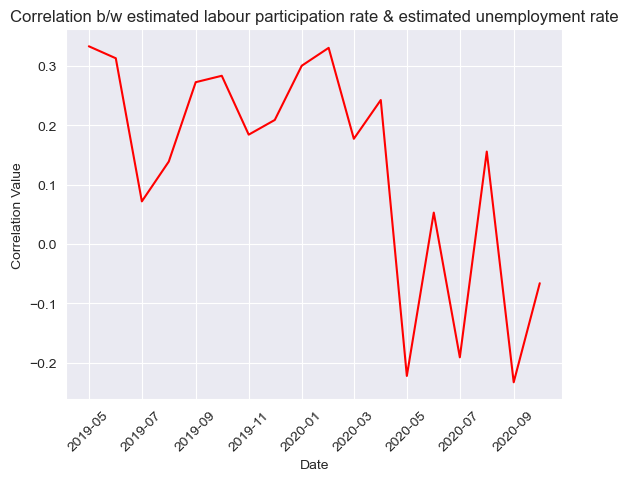

In [190]:
sns.set_style("darkgrid")
sns.lineplot(corr, color="red")
plt.xlabel("Date")
plt.ylabel("Correlation Value")
plt.title("Correlation b/w estimated labour participation rate & estimated unemployment rate")
plt.xticks(rotation=45)
plt.plot()

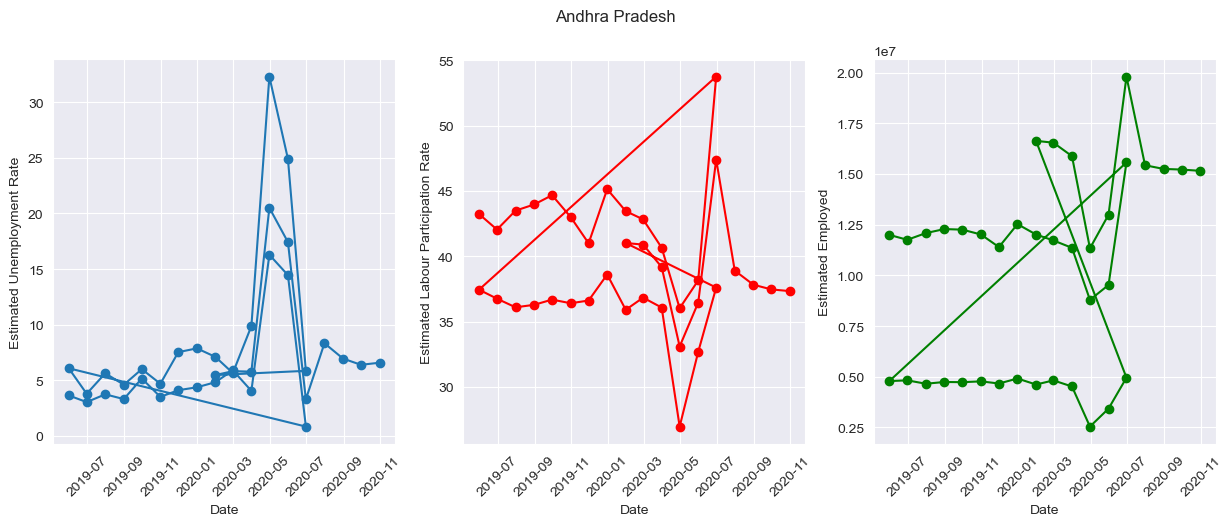

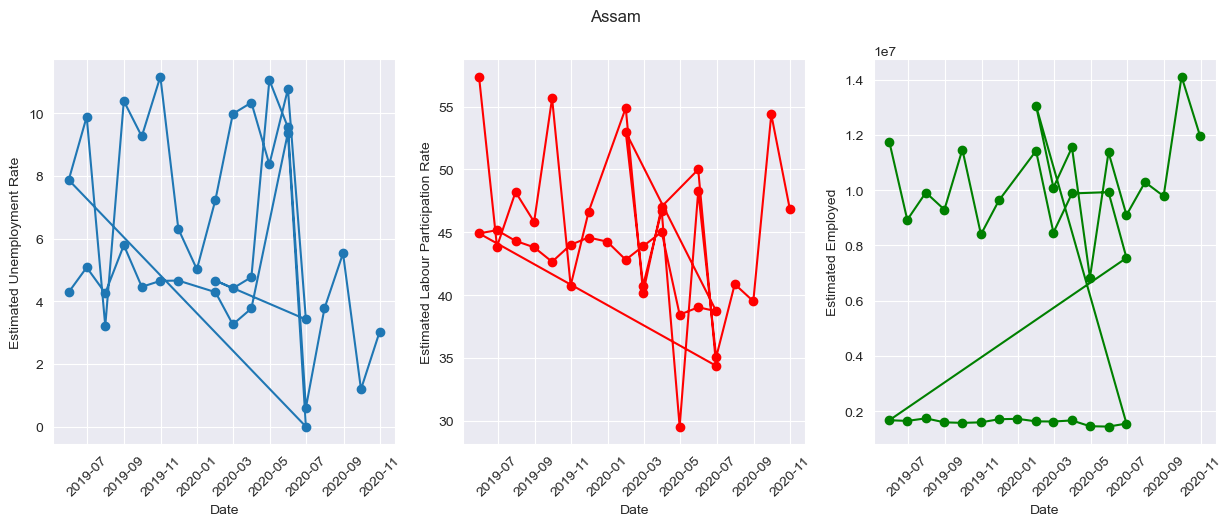

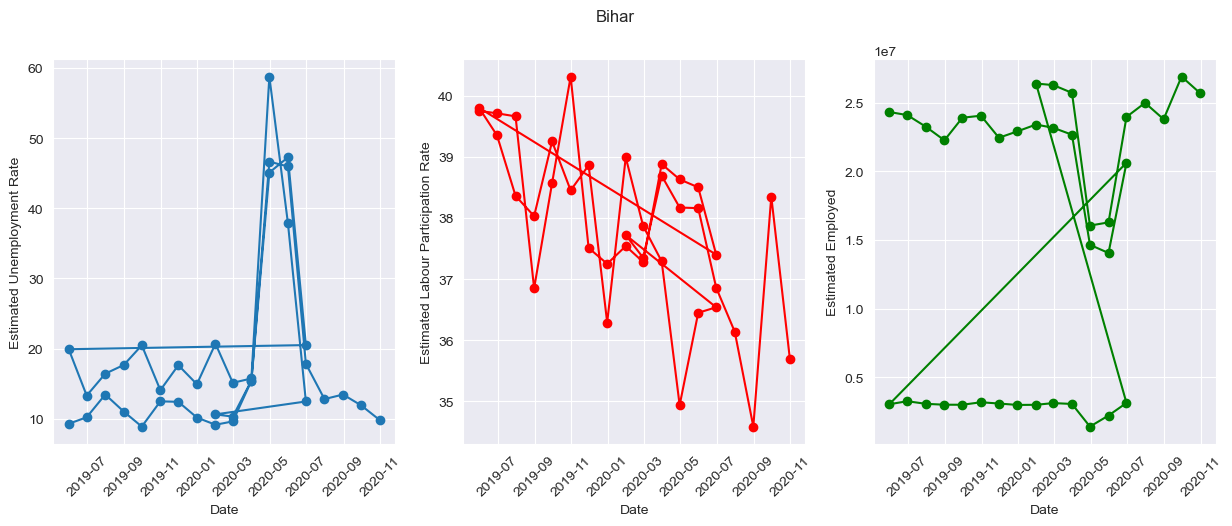

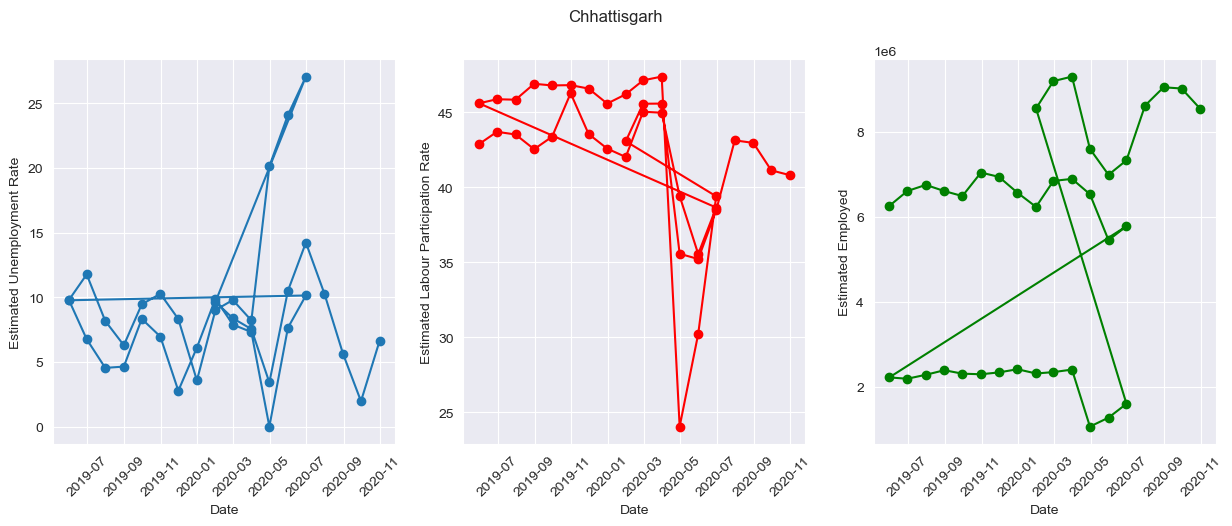

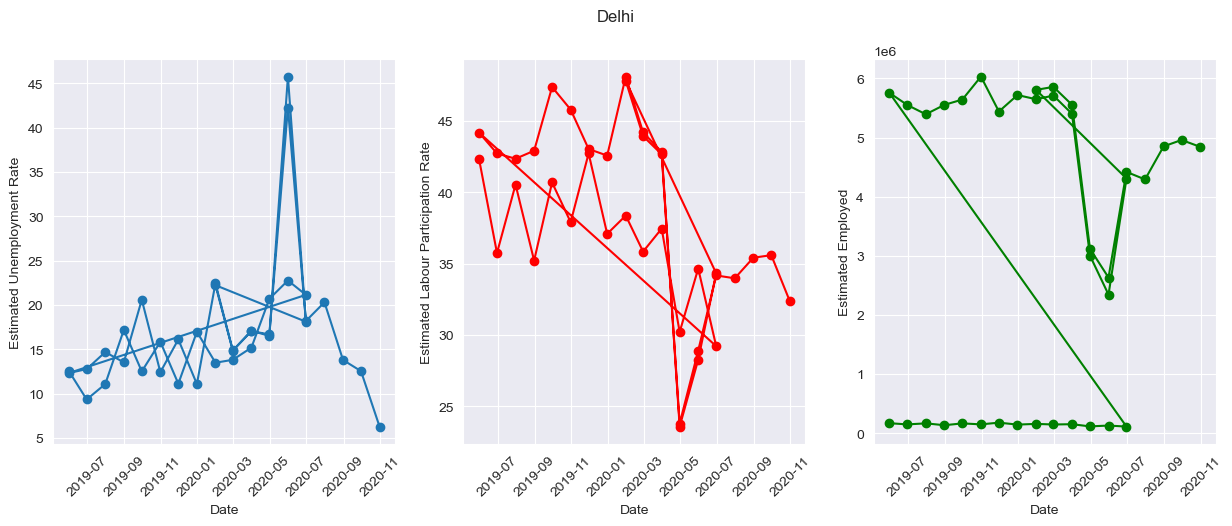

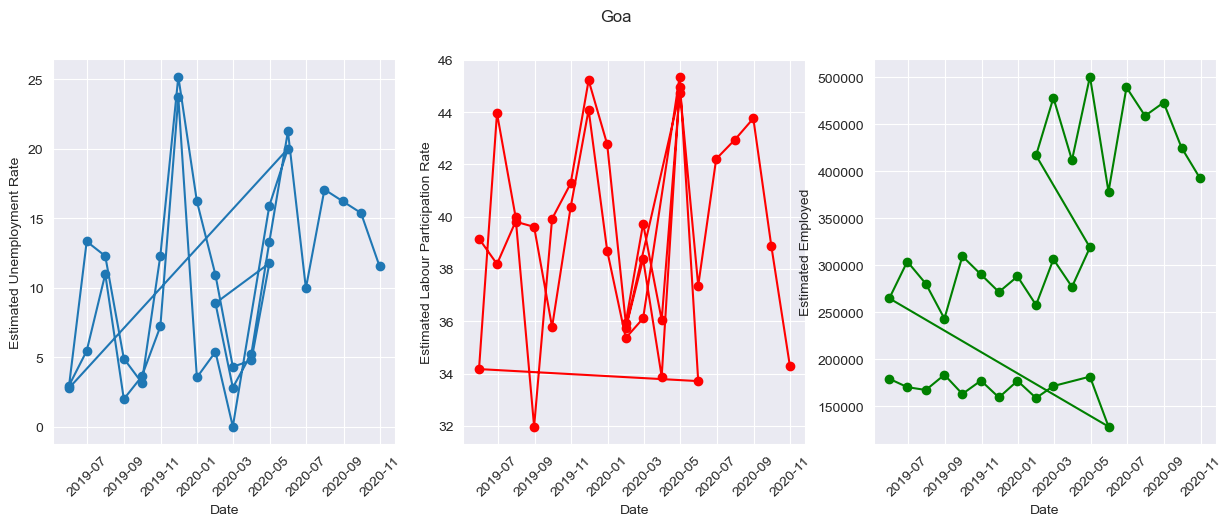

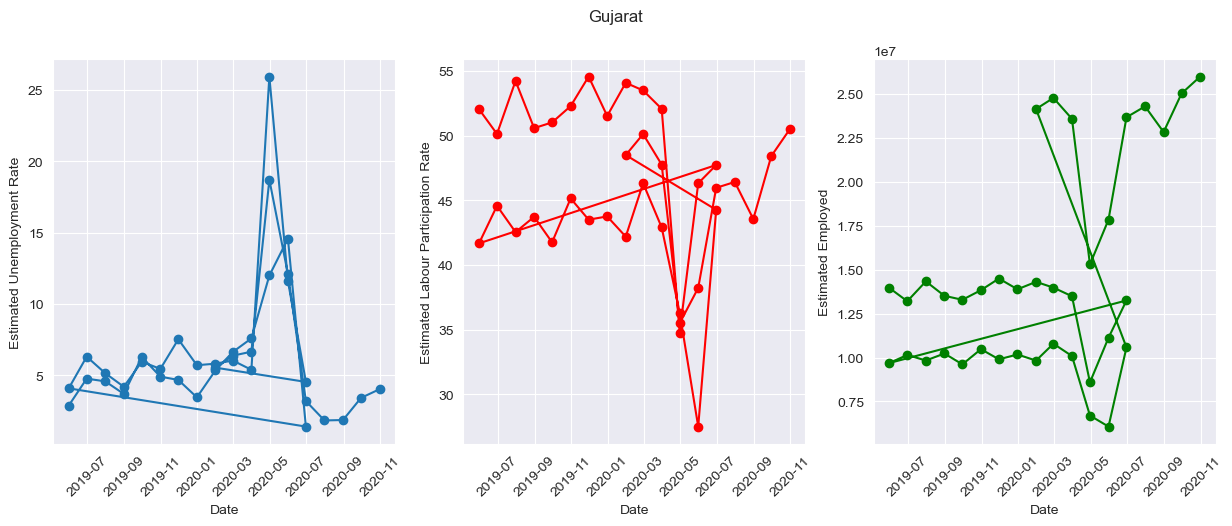

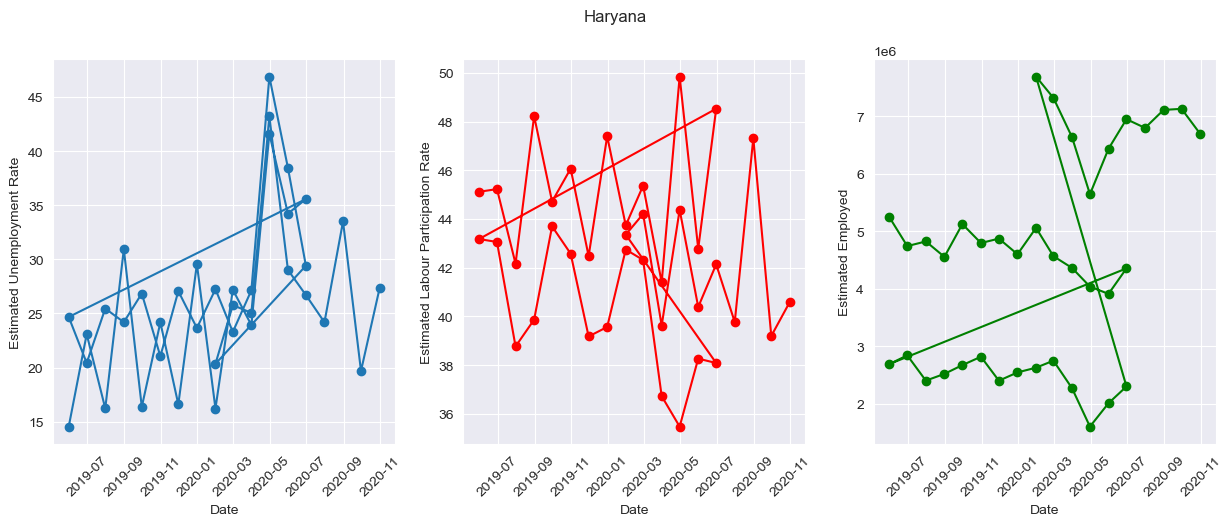

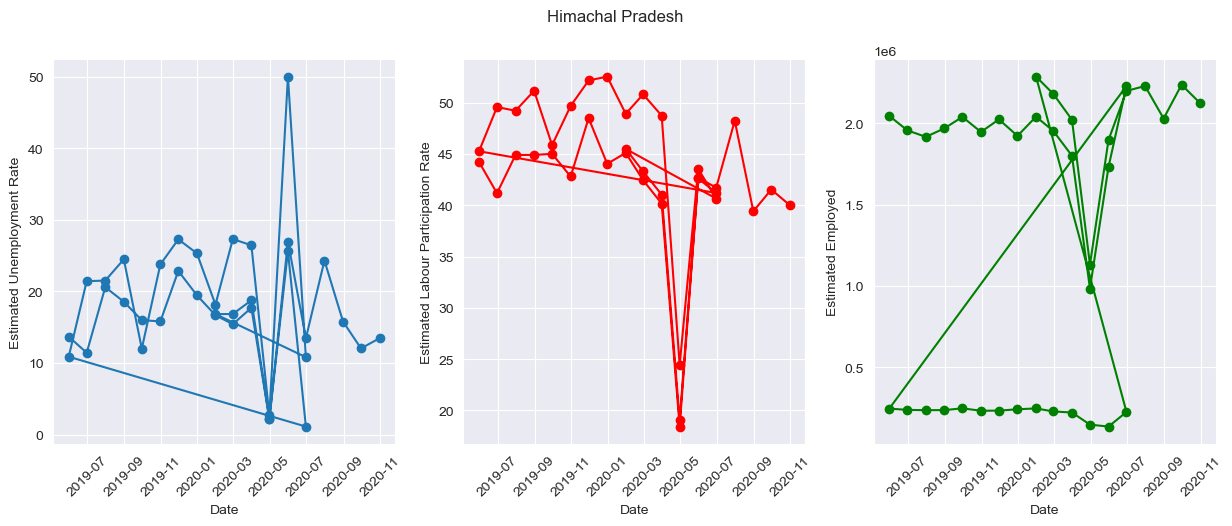

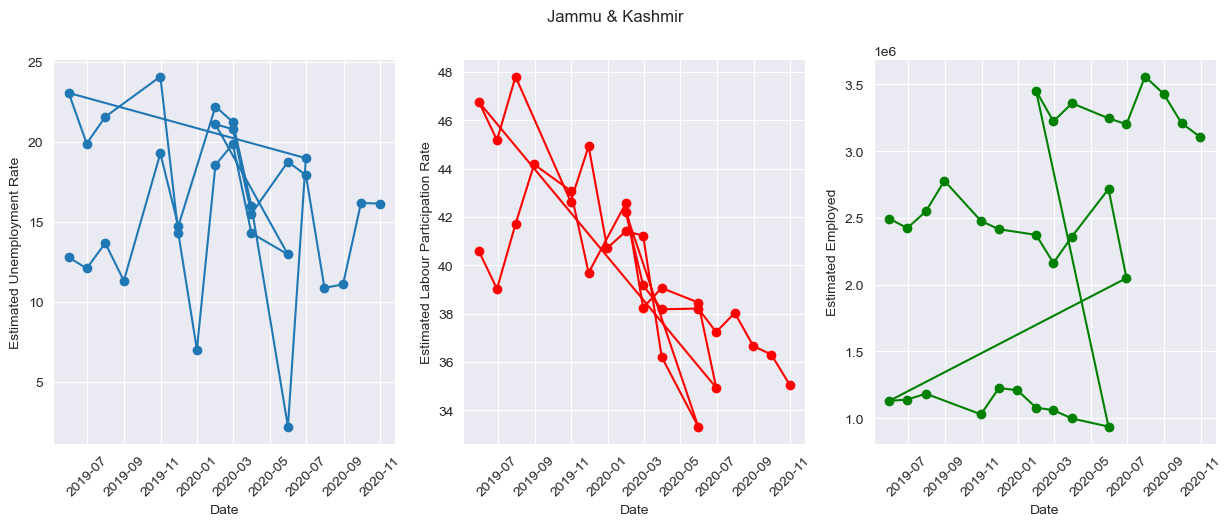

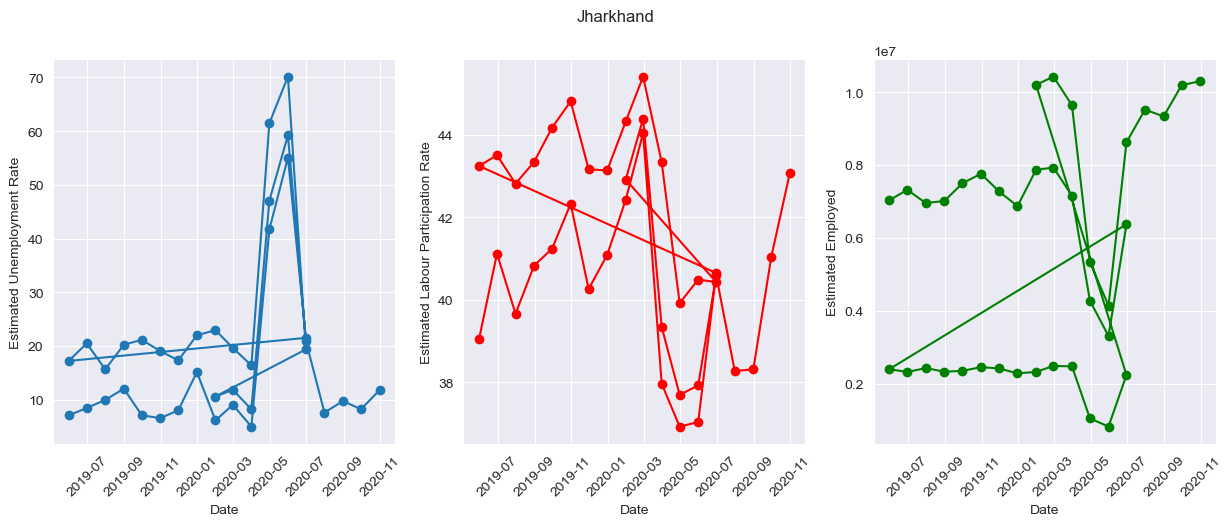

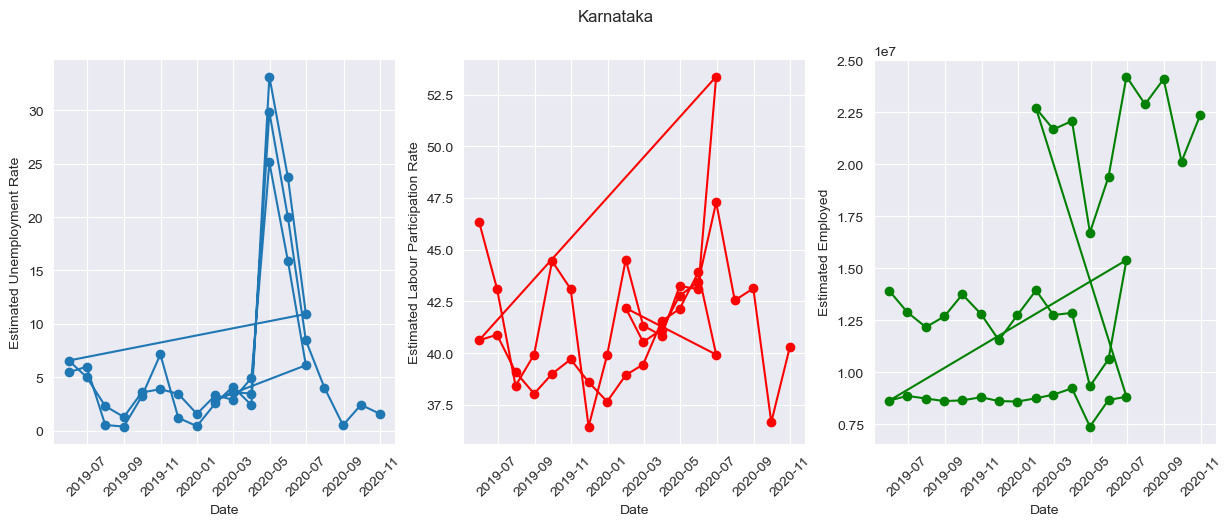

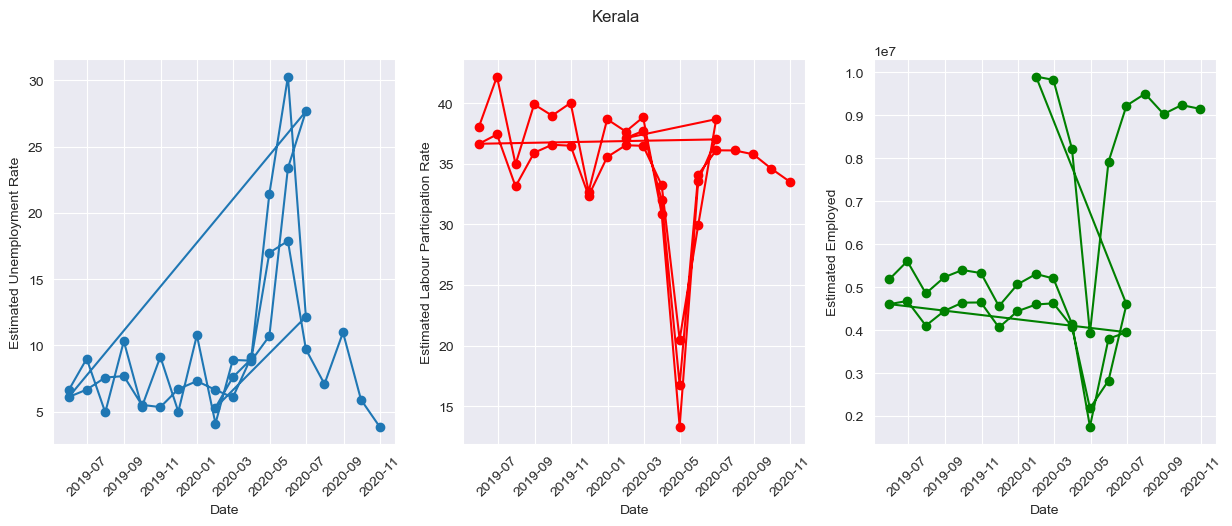

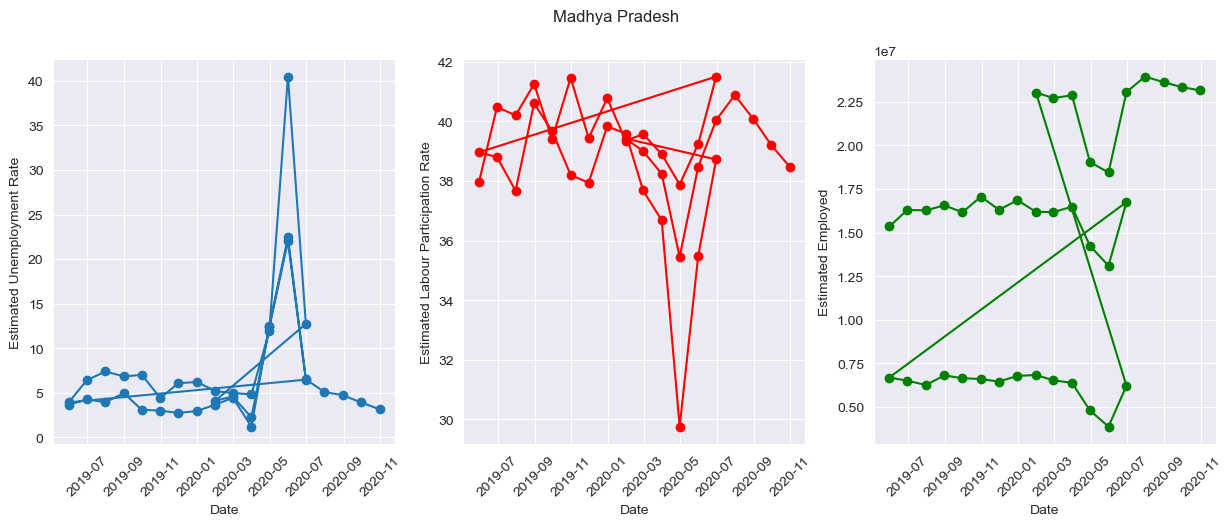

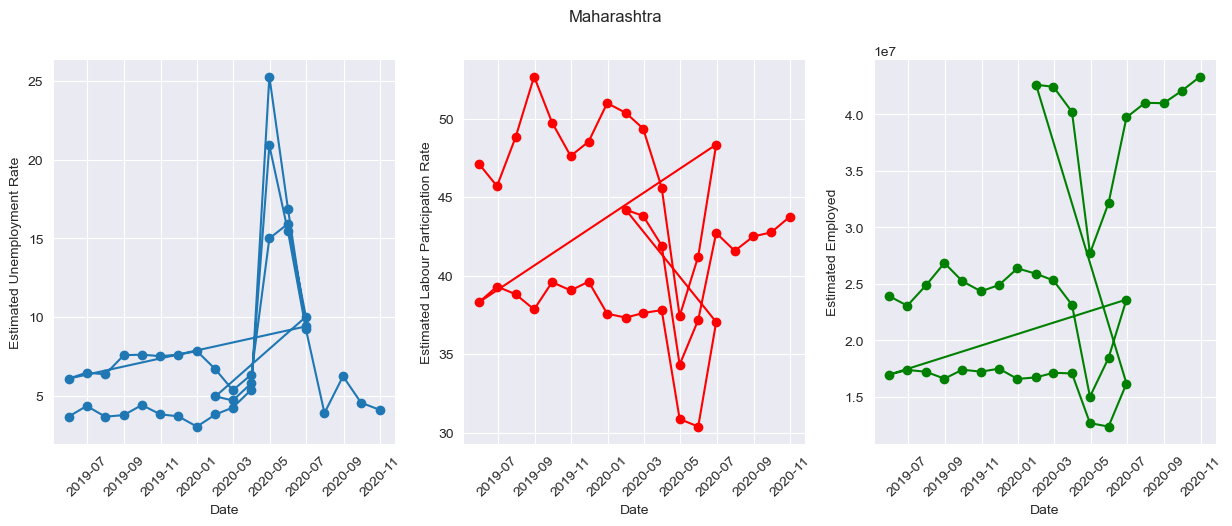

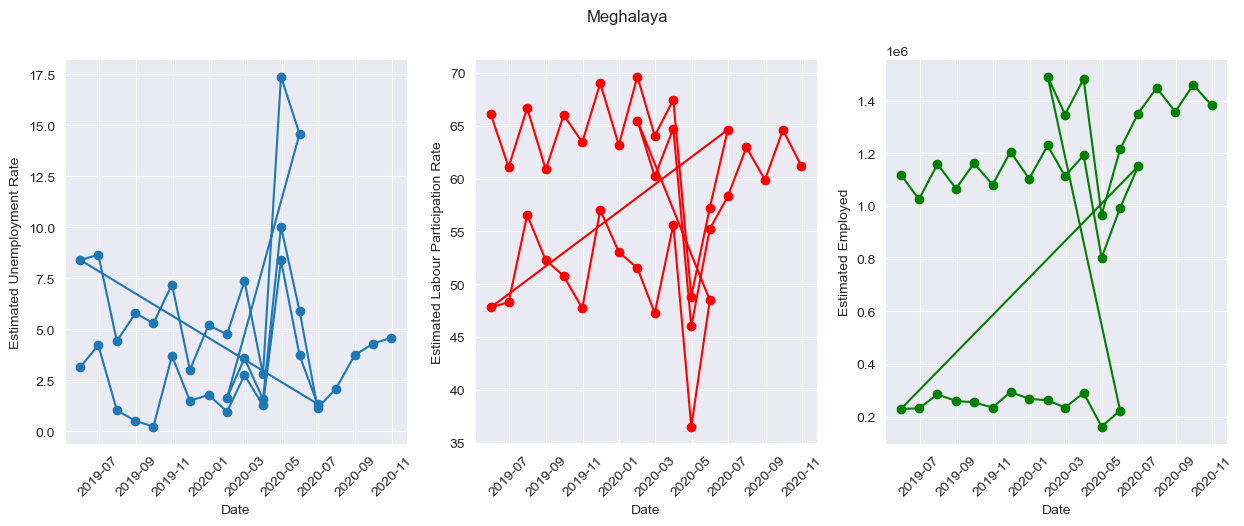

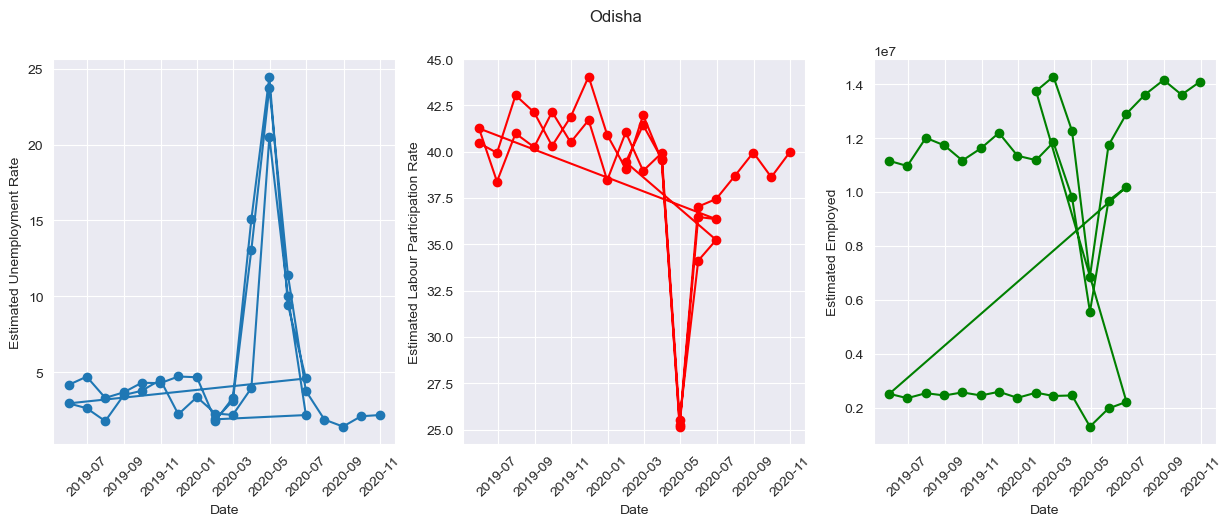

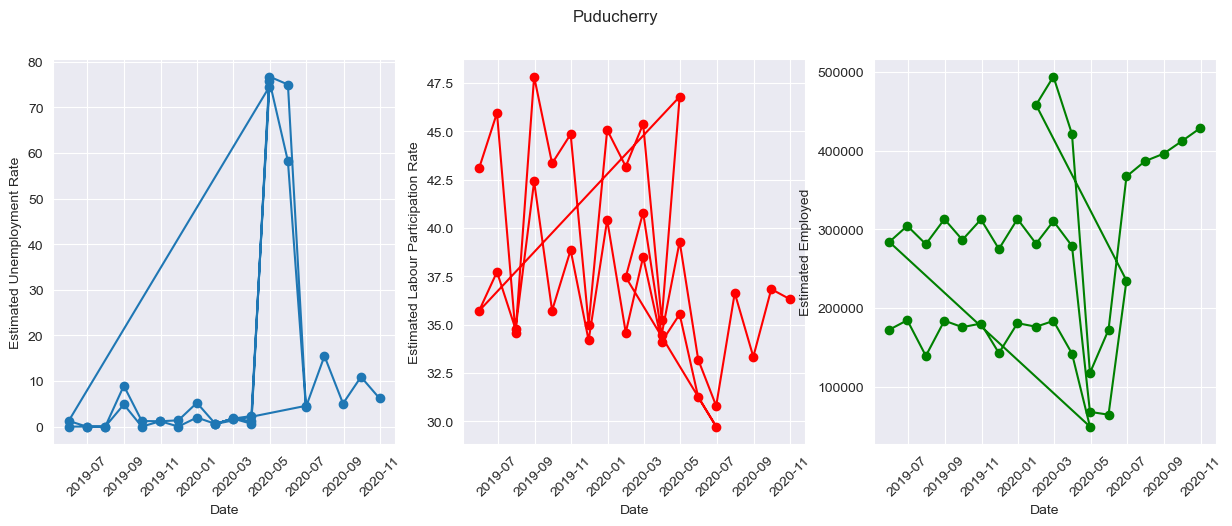

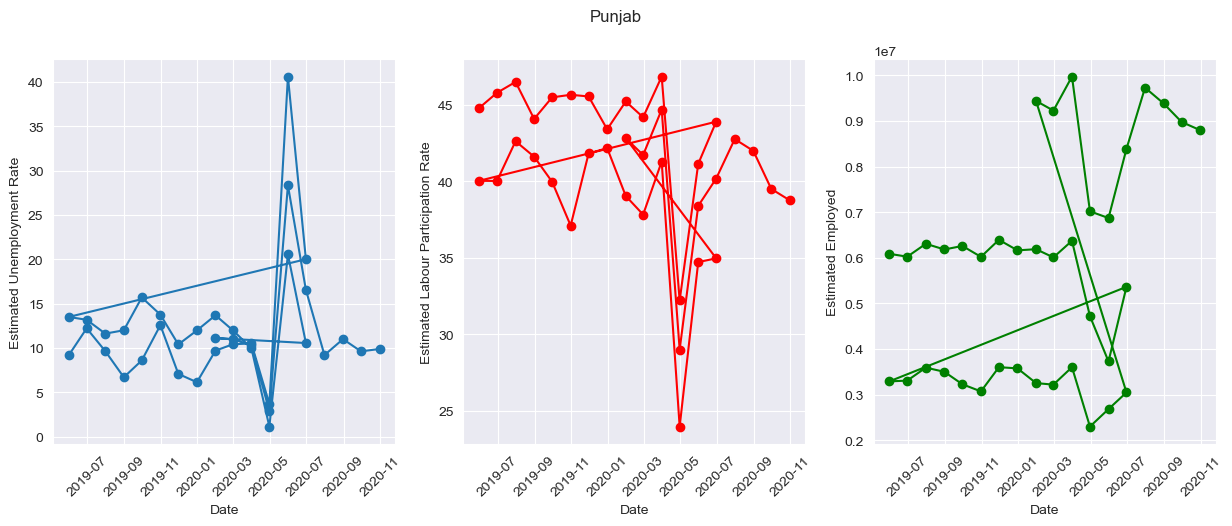

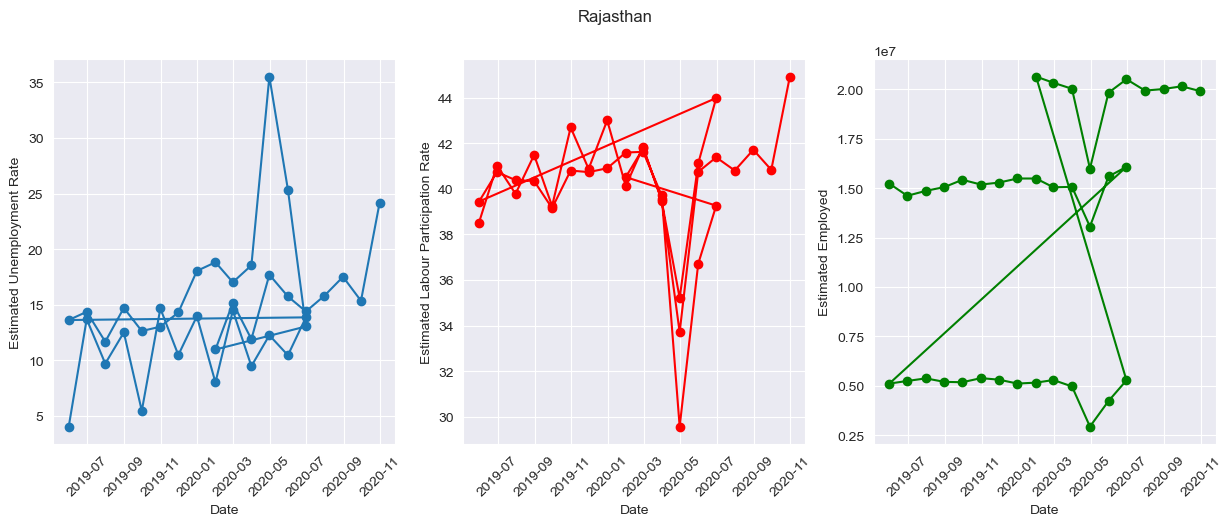

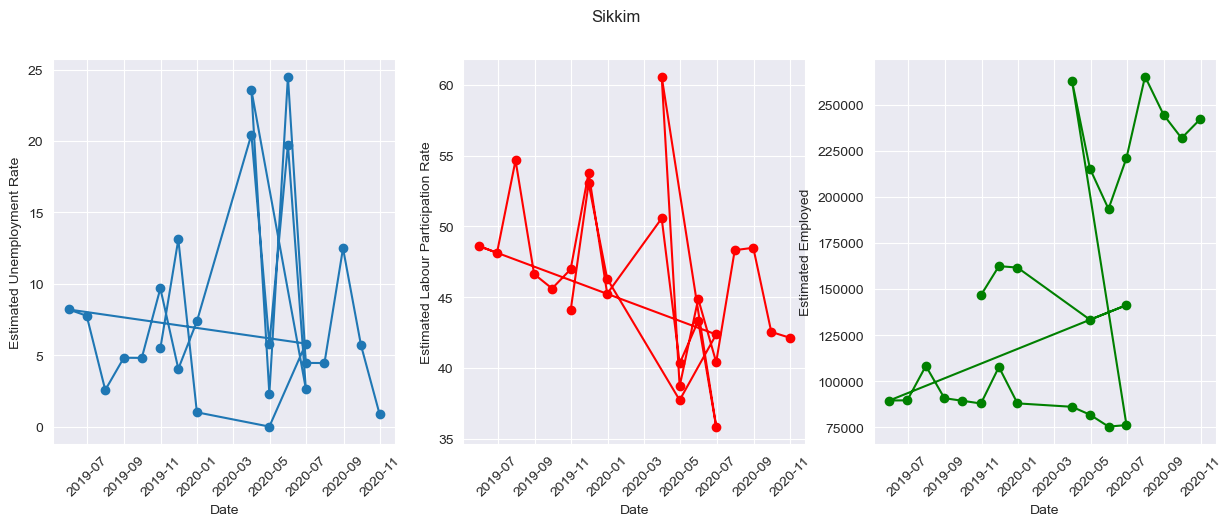

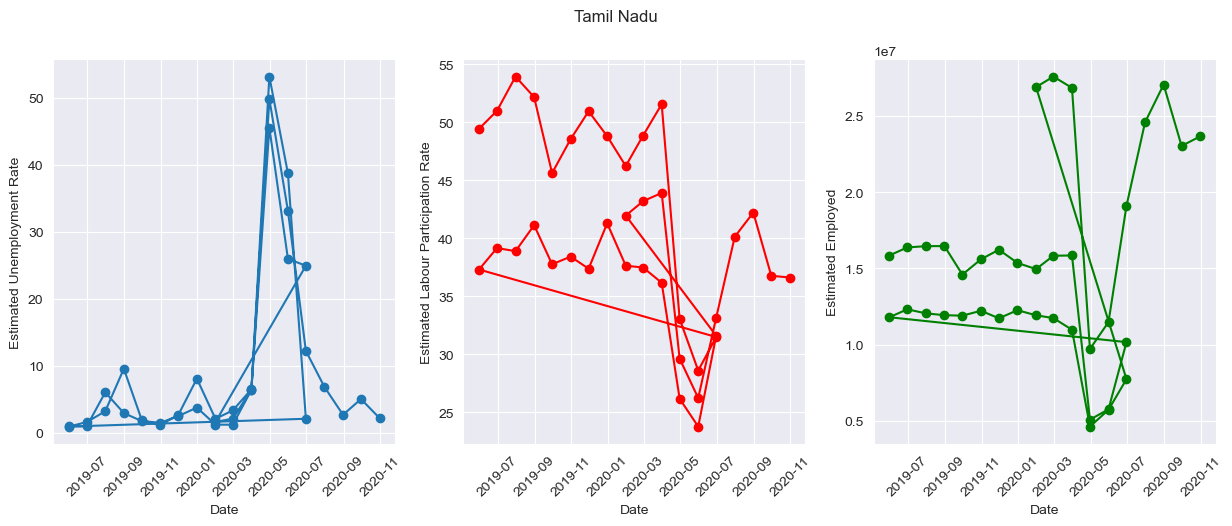

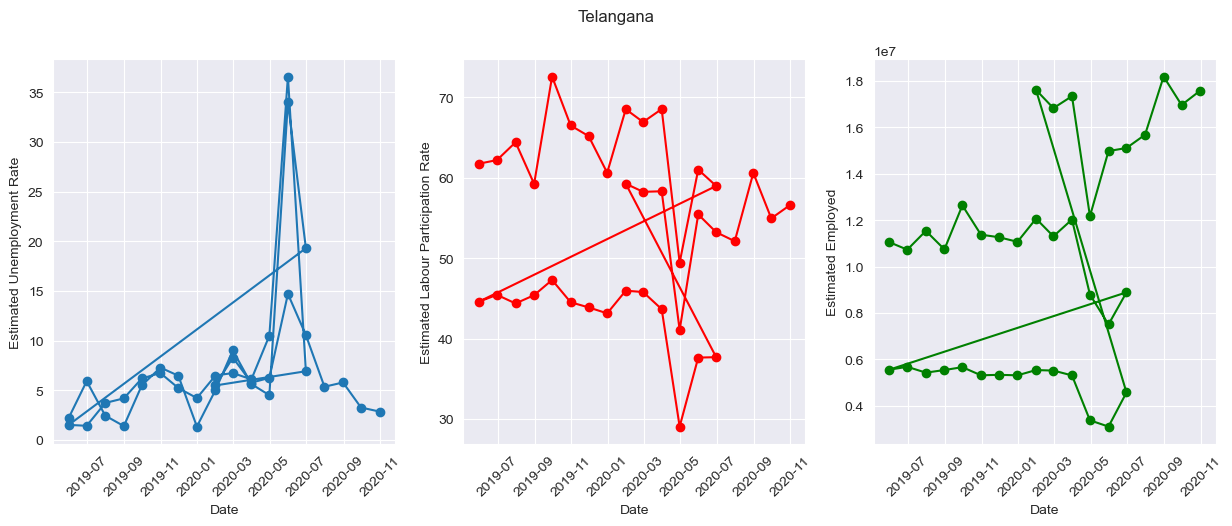

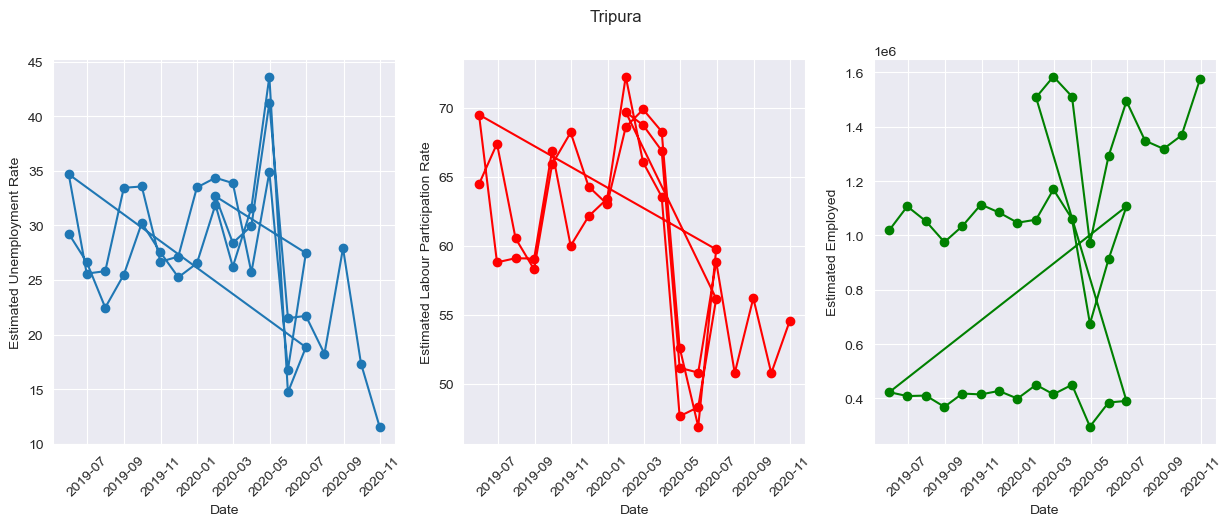

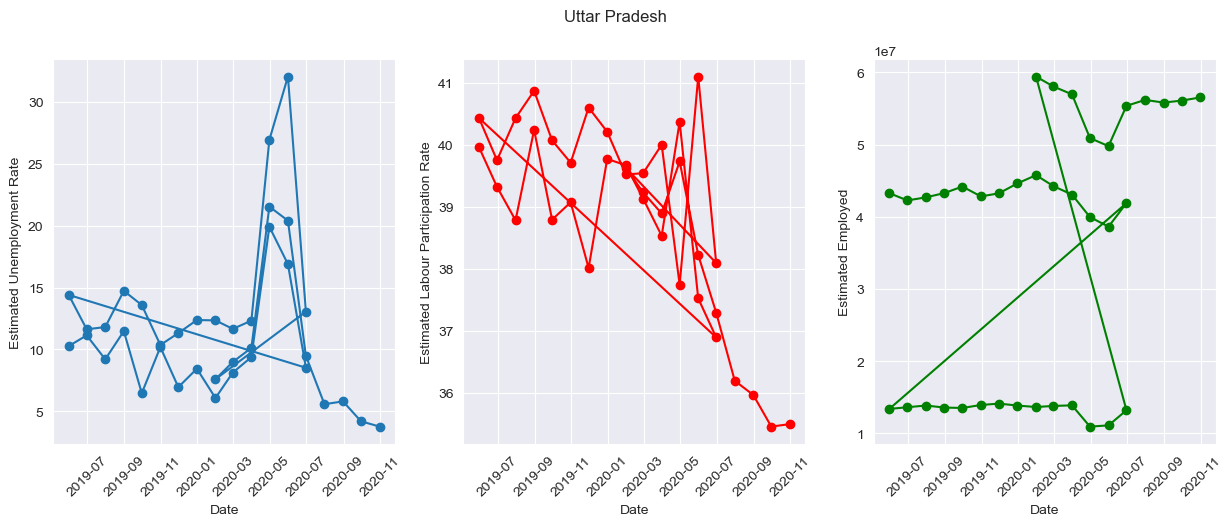

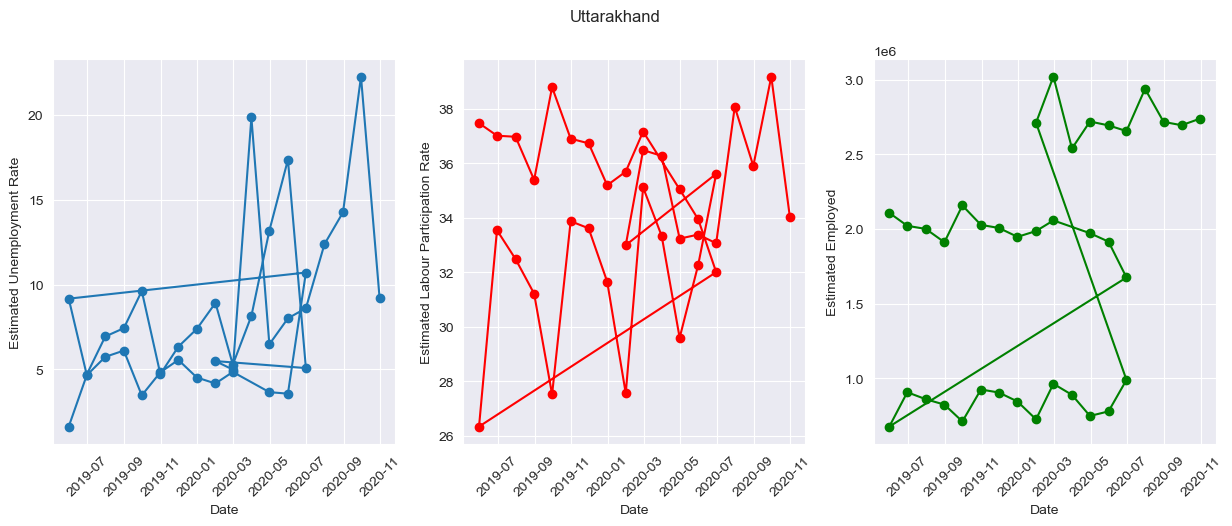

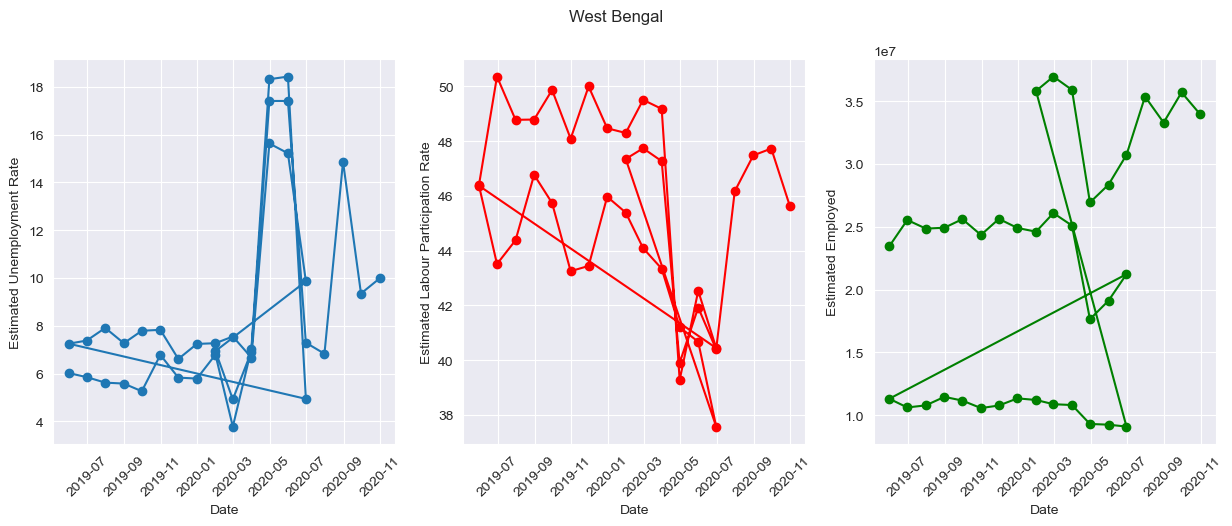

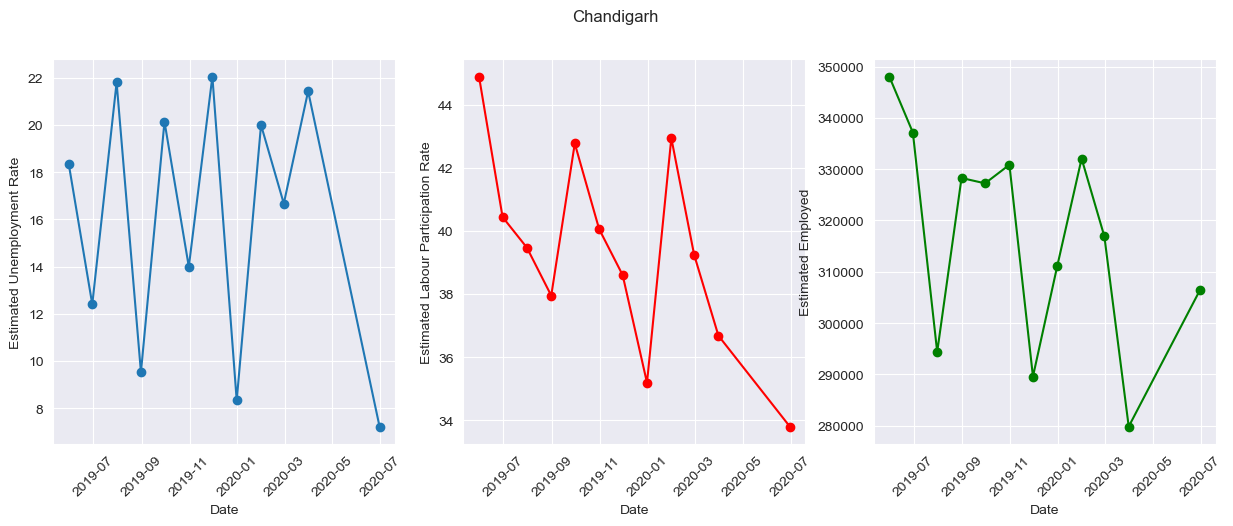

In [191]:
for region in df["region"].unique():
    date = df[df["region"] == region]["date"]
    unemployment_rate = df[df["region"] == region]["estimated unemployment rate (%)"]
    labour_rate = df[df["region"] == region]["estimated labour participation rate (%)"]
    employed = df[df["region"] == region]["estimated employed"]

    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(date, unemployment_rate, marker="o", linestyle="-")
    plt.xlabel("Date")
    plt.ylabel("Estimated Unemployment Rate")
    plt.xticks(rotation=45)

    plt.subplot(1,3,2)
    plt.plot(date, labour_rate, marker="o", linestyle="-", color="red")
    plt.xlabel("Date")
    plt.ylabel("Estimated Labour Participation Rate")
    fig.suptitle(region.title())
    plt.xticks(rotation=45)
    plt.plot()

    plt.subplot(1,3,3)
    plt.plot(date, employed, marker="o", linestyle="-", color="green")
    plt.xlabel("Date")
    plt.ylabel("Estimated Employed")
    fig.suptitle(region.title())
    plt.xticks(rotation=45)
    plt.plot() 